#### CSV -> DateFrame

In [44]:
import pandas as pd
import numpy as np

CSV (Comma-Separated Values)
a **plain text file** where each line represents a record, and each column is separated by a **comma**.

```python
Date,Product,Quantity,Price,Total 
2023-01-01,Apple,10,0.5,5 
2023-01-02,Banana,5,0.2,1

Example: `sales_data.csv`
| Date       | Product | Quantity | Price | Total |
|------------|---------|---------|-------|-------|
| 2023-01-01 | Apple   | 10      | 0.5   | 5     |
| 2023-01-02 | Banana  | 5       | 0.2   | 1     |

In [45]:
df=pd.read_csv("sales_data.csv",parse_dates=['Date'],dayfirst=True) 
# df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Product,Quantity,Price,Total
0,2023-01-01,Chocolate,5,10.0,50.0
1,2023-01-02,Biscuits,7,20.0,140.0
2,2023-01-03,Sweets,9,15.0,135.0
3,2023-01-04,Water,3,7.5,22.5
4,2023-01-05,Orange Juice,8,12.5,100.0
...,...,...,...,...,...
146,2022-04-06,NaN,5,10.0,50.0
147,2022-04-07,Biscuits,7,20.0,140.0
148,2022-04-08,Sweets,9,15.0,135.0
149,2022-04-09,Water,3,7.5,22.5


In [46]:
df.fillna({'Product':'Unknown','Quantity':0,'Price':0.0,'Total':0.0},inplace=True) # missing

In [47]:
rpl_dic={
    'Product':'Unknown',
    'Quantity':0,
    'Price':0.0,
    'Total':0.0
}
df=df.replace(np.nan,rpl_dic) # replace   np.nan -> missing values in data analyse

Global replacement: {old: new} → replace the same value everywhere.

Column-wise replacement: {col: val} → replace per column, can use different replacement values.

see in slide 'Data Manipulation'

In [48]:
df['Total']=df['Quantity']*df['Price']
df

,Date,Product,Quantity,Price,Total
0,2023-01-01,Chocolate,5,10.0,50.0
1,2023-01-02,Biscuits,7,20.0,140.0
2,2023-01-03,Sweets,9,15.0,135.0
3,2023-01-04,Water,3,7.5,22.5
4,2023-01-05,Orange Juice,8,12.5,100.0
...,...,...,...,...,...
146,2022-04-06,Unknown,5,10.0,50.0
147,2022-04-07,Biscuits,7,20.0,140.0
148,2022-04-08,Sweets,9,15.0,135.0
149,2022-04-09,Water,3,7.5,22.5


Product
Biscuits        203
Chocolate       120
Orange Juice    248
Sweets          261
Unknown          33
Water            96
Name: Quantity, dtype: int64


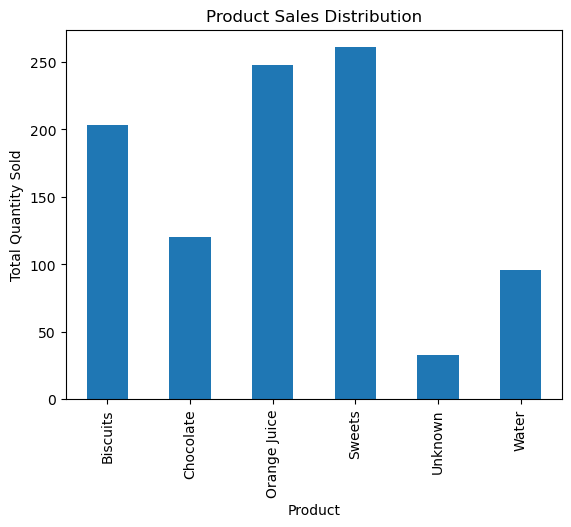

In [49]:
import matplotlib.pyplot as plt

product_sales_series=df.groupby('Product')['Quantity'].sum()
print(product_sales_series)
# product_sales_series = df['Total'].groupby(df['Product']).sum()
product_sales_series.plot(kind='bar',title='Product Sales Distribution')
# plt.title=('Product Sales Distribution')
plt.ylabel('Total Quantity Sold')
plt.show()

#### Key point:
Even though product_sales_series is a **Series**, .plot() automatically uses the **index for the x-axis** and **values for the y-axis**.

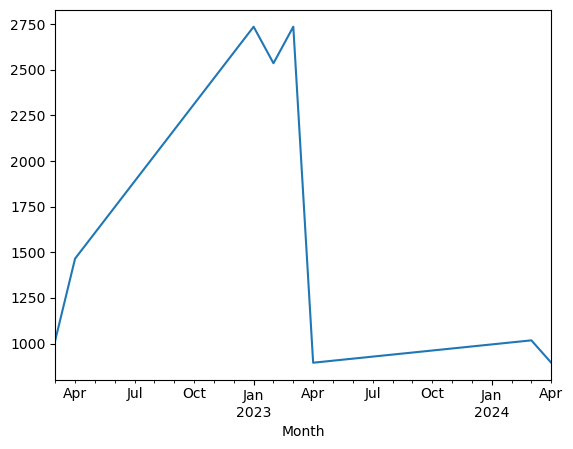

In [50]:
df['Month']=df['Date'].dt.to_period('M')  # extracting the month period (e.g., 2023-01) from the 'Date' column, thus create a new column 'Month'
monthly_sales_series=df.groupby('Month')['Total'].sum()
monthly_sales_series.plot(kind='line')
plt.show()

C:\Users\joey\AppData\Local\Temp\ipykernel_17164\2126355858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Month'] = df_2023['Date'].dt.to_period('M')


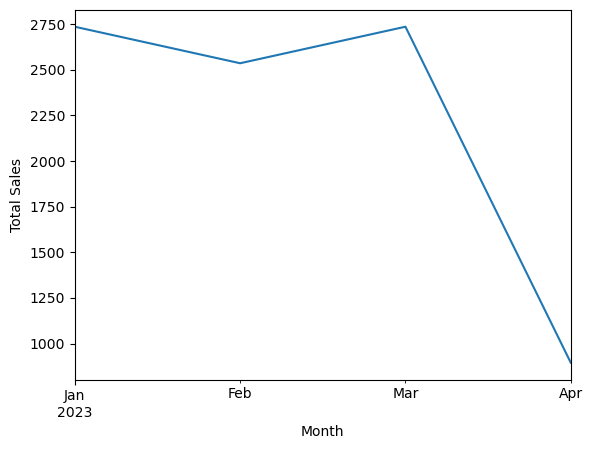

In [51]:
mask=df['Date'].dt.year==2023 # Perform an element-wise operation on the entire 'Date' column returns a Boolean Series (True/False) for each row in the DataFrame
df_2023=df[mask]
df_2023['Month'] = df_2023['Date'].dt.to_period('M')
monthly_sales_series=df_2023.groupby('Month')['Total'].sum()
monthly_sales_series.plot(kind='line')
plt.title=('Total Sales Over Time')
plt.ylabel('Total Sales')
plt.show()

When perform operations like +, -, *, /, >, ==, etc. on a pandas column (e.g. df['Date'] or df['Price']),
each element in that column is processed individually.
mask=df['Price']>10
| Price | Price |
| ----- | ------ |
| 5.0   | False  |
| 20.0  | True   |
| 15.0  | True   |
| 7.5   | False  |


In [52]:
# df.to_csv("cleaned_sales_data.csv",index=False)
df.to_csv("cleaned_sales_data.csv")

#### CSV -> Sqlite

In [53]:
import sqlite3 as sql
import pandas as pd

In [54]:
df=pd.read_csv("cleaned_sales_data.csv", parse_dates=['Date'], dayfirst=True)
df=df.iloc[:,1:] 
df['Date'] = pd.to_datetime(df['Date'])

In [65]:
# df = df.drop_duplicates(subset=['Date', 'Product'])
df=df.drop_duplicates()
df.shape
df

,Date,Product,Quantity,Price,Total,Month
0,2023-01-01,Chocolate,5,10.0,50.0,2023-01
1,2023-01-02,Biscuits,7,20.0,140.0,2023-01
2,2023-01-03,Sweets,9,15.0,135.0,2023-01
3,2023-01-04,Water,3,7.5,22.5,2023-01
4,2023-01-05,Orange Juice,8,12.5,100.0,2023-01
...,...,...,...,...,...,...
140,2022-03-31,Orange Juice,8,12.5,100.0,2022-03
141,2022-04-01,Chocolate,5,10.0,50.0,2022-04
142,2022-04-02,Biscuits,7,20.0,140.0,2022-04
143,2022-04-03,Sweets,9,15.0,135.0,2022-04


In [56]:
DB_FILE="SalesDB.db"
def init_db():
    db=sql.connect(DB_FILE)
    cursor=db.cursor()
    
    # Create a table called Sales with foru fields
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Sales(
            Date text,
            Product text,
            Quantity int,
            Price MONEY(10,5),
            Total MONEY(10,5)
            );
    """)
    db.commit()
    
    db.close()
    
def save_sale(df):
    db=sql.connect(DB_FILE)
    cursor=db.cursor()
    for _,row in df.iterrows():
            # Insert data into the table
            cursor.execute("INSERT INTO Sales(Date,Product,Quantity,Price,Total)VALUES(?,?,?,?,?)",(row['Date'].strftime('%Y-%m-%d'),row['Product'],row['Quantity'],row['Price'],row['Total']))
    db.commit()
    print("Data inserted into SalesDB.")
    db.close()
    
# row['Date'].strftime('%Y-%m-%d') transfer datetime object into String cause'Date text' when creating a table 

init_db()
save_sale(df)

In [57]:
db=sql.connect(DB_FILE)
cursor=db.cursor()

cursor.execute("select sum(Total) from Sales where strftime('%Y', Date) = '2023'")
 # (8900.0,)
 # [0] 8900.0
total_sales = cursor.fetchone()[0]
print("Total Sales in 2023:", total_sales)

db.close()

Total Sales in 2023: 8900.0


In [64]:
db=sql.connect(DB_FILE)
cursor=db.cursor()

# cursor.execute("select Product and Quantity(grouped by Product) from Sales where strftime('%Y', Date) = '2023' ordered by desc")
cursor.execute("""select Product,sum(Quantity) as totalQuantity from Sales
where strftime('%Y', Date) = '2023'
group by Product
order by totalQuantity desc""")

# for row in cursor.fetchall():
#     print(row)
# ('Sweets', 180)
# ('Orange Juice', 152)
# ('Biscuits', 140)
# ('Chocolate', 95)
# ('Water', 60)
# ('Unknown', 13)

for row in cursor.fetchall():
    product = row[0]
    total_quantity = row[1]
    print(f"Product: {product}, Total Quantity sold: {total_quantity}")

db.close()

Product: Sweets, Total Quantity sold: 180
Product: Orange Juice, Total Quantity sold: 152
Product: Biscuits, Total Quantity sold: 140
Product: Chocolate, Total Quantity sold: 95
Product: Water, Total Quantity sold: 60
Product: Unknown, Total Quantity sold: 13
